In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [3]:
# Wilshire US Mid-Cap Total Market Index (WILLMIDCAP) 
# https://fred.stlouisfed.org/series/WILLMIDCAP
# Wilshire US Large-Cap Total Market Index (WILLLRGCAP) 
# https://fred.stlouisfed.org/series/WILLLRGCAP
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 

# Wilshire US Small-Cap Total Market Index (WILLSMLCAP) 

df = FredReader(
    ['WILLSMLCAP',
     'WILLMIDCAP',
     'WILLLRGCAP',
    ],
    start=datetime.today() - timedelta(days=365*100)
).read().ffill().dropna()

In [4]:
df

,WILLSMLCAP,WILLMIDCAP,WILLLRGCAP
DATE,,,
1978-06-30,1000.00,1000.00,1000.00
1978-07-03,1000.00,1000.00,1000.00
1978-07-04,1000.00,1000.00,1000.00
1978-07-05,1000.00,1000.00,1000.00
1978-07-06,1000.00,1000.00,1000.00
...,...,...,...
2021-10-25,184812.22,208438.20,151905.10
2021-10-26,183543.39,207313.54,152128.82
2021-10-27,180047.92,204039.33,151231.78


In [8]:
## Vanguard Mid-Cap ETF (VO)
df['midcap_etf'] = yfin.Ticker('vo').history(period='max')['Close'].ffill()
#
## Vanguard Extended Market ETF (VXF) all - sp500
df['nosp500_etf'] = yfin.Ticker('vxf').history(period='max')['Close'].ffill()

In [9]:
df = df.dropna()
df = df/df.shift(365, freq='D')
df = df.dropna()
df

,WILLSMLCAP,WILLMIDCAP,WILLLRGCAP,midcap_etf,nosp500_etf
DATE,,,,,
2005-02-01,1.115564,1.124650,1.072489,1.140437,1.114319
2005-02-02,1.124142,1.131921,1.075920,1.152192,1.124112
2005-02-03,1.147041,1.144611,1.081750,1.162244,1.135353
2005-02-04,1.153766,1.153802,1.092122,1.176676,1.145230
2005-02-08,1.125310,1.130287,1.079722,1.154192,1.118655
...,...,...,...,...,...
2021-10-22,1.456488,1.380246,1.343167,1.380902,1.407909
2021-10-26,1.479113,1.401591,1.372122,1.396383,1.431297
2021-10-27,1.467496,1.393964,1.367647,1.386461,1.412235


<AxesSubplot:xlabel='DATE'>

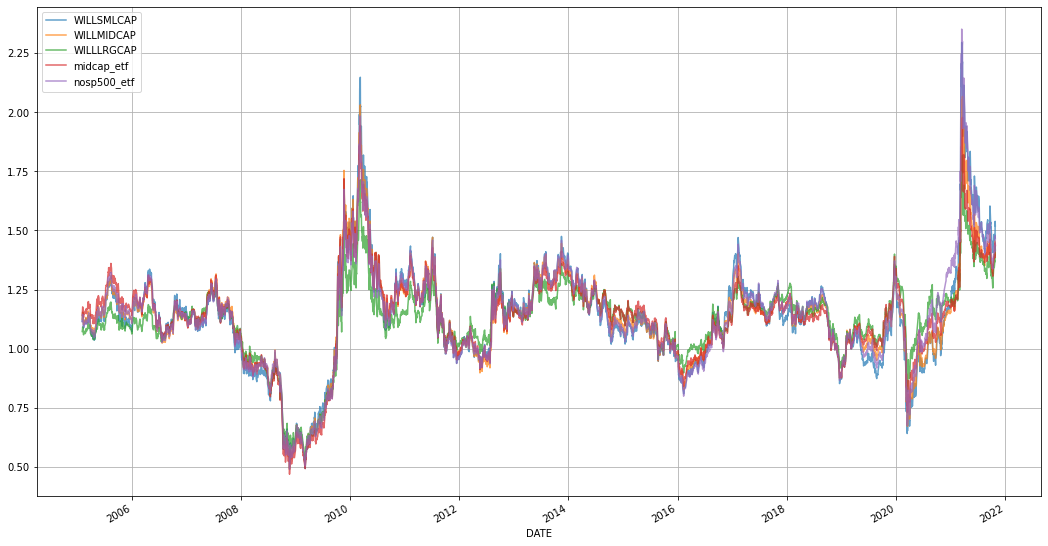

In [10]:
df.plot(grid=True, alpha=0.7)